# Exploring generations

In [2]:
# improts
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import re
from pathlib import Path
from glob import glob
import pickle
import shutil
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage
import py3Dmol

from ipywidgets import interact,fixed,IntSlider

IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 500,500

templates = Path('../templates/')
generation_path = Path('~').expanduser()/'generation_correct_scoring'


### First test generation

In [3]:
generation_path

PosixPath('/home/magstr/generation_correct_scoring')

In [4]:
files = generation_path.rglob('*xtbopt.xyz')

In [4]:
paths = sorted(files)

In [5]:
paths

[]

In [5]:
def draw_generation(
    mols,
    width=800,
    height=600,
    Hs=False,
    confId=-1,
    multipleConfs=False,
    atomlabel=False,
):
    try:
        p = py3Dmol.view(width=width, height=height)
        if type(mols) is not list:
            mols = [mols]
        for mol in mols:
            if multipleConfs:
                for conf in mol.GetConformers():
                    mb = Chem.MolToMolBlock(mol, confId=conf.GetId())
                    p.addModel(mb, "sdf")
            else:
                if type(mol) is str:
                    if os.path.splitext(mol)[-1] == ".xyz":
                        xyz_f = open(mol)
                        line = xyz_f.read()
                        xyz_f.close()
                        p.addModel(line, "xyz")
                else:
                    mb = Chem.MolToMolBlock(mol, confId=confId)
                    p.addModel(mb, "sdf")
        p.setStyle({"stick": {"radius": 0.2}})
        if atomlabel:
            p.addPropertyLabels("index")  # ,{'elem':'H'}
        p.zoomTo()
        p.update()
        # p.show()
    except Exception as e:
        print(e)
        print("py3Dmol, RDKit, and IPython are required for this feature.")

In [6]:
#draw3d(str(paths[4]))

In [7]:
#paths[0]

In [8]:
confs = [path for path in paths]

def conf_viewer(idx):
    mol = confs[idx]
    return draw_generation(str(paths[idx]))

#interact(conf_viewer, idx=IntSlider(min=0,max=len(paths)-1, step=1))

NameError: name 'paths' is not defined

In [9]:
templates = Path('../templates/')
generation_path = Path('~').expanduser()/'generation_prim_amine'

In [10]:
files = generation_path.rglob('*xtbopt.xyz')
paths = sorted(files)

In [11]:
confs = [path for path in paths]

def conf_viewer(idx):
    mol = confs[idx]
    return draw_generation(str(paths[idx]))

interact(conf_viewer, idx=IntSlider(min=0,max=len(paths)-1, step=1))
# 0, 34, 64, 71, 104, 186, 178
# 27 weird, 172 ?!?

interactive(children=(IntSlider(value=0, description='idx', max=156), Output()), _dom_classes=('widget-interac…

<function __main__.conf_viewer(idx)>

In [16]:
draw_generation(str(paths[172]))

IndexError: list index out of range

In [52]:
smart = "[1*][N]([H])([H])"
    # Initialize pattern
patt = Chem.MolFromSmarts(smart)

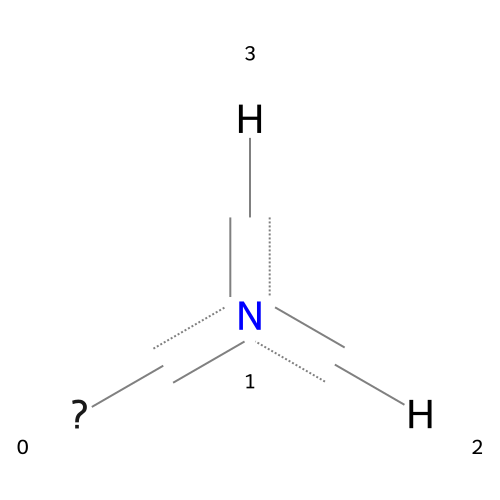

In [53]:
patt